In [1]:
import random
import time
import matplotlib.pyplot as plt

#50부터 인자로 받은 num사이로 물건의 개수를 랜덤하게 설정한다. 즉
#n개의 물건을 설정할 때 n개는 몇인지를 random하게 뽑는다.
#val는 n개의 물건들의 각 달러값을 넣는 리스트이다.
#wt는 n개의 물건들의 각 무게값을 넣는 리스트이다.
def random_num(num):
    global n
    n = random.randrange(50,num)
    print("아이템의 개수는 ", n,"개 입니다.")

    global val
    global wt
    global W
    val = []
    wt = []
    W = int((n**2) / 2)
    for i in range(n):
        val.append(random.randrange(1,n*2+1))
    for j in range(1,n+1):
        wt.append(j)    

#plot를 그리는 함수를 지정하였다.
def plotting(x, y):
    x.sort()
    y.sort()
    plt.plot(x,y,'bo-.')
    plt.xlabel('n')
    plt.ylabel('running time')
    plt.title('Average actual running time with various values of n')
    plt.show()

#value_kanpSack과 print_item_knapSack은 2017204081_최수지(1)의 코드와 동일하므로 주석을 생략한다.
def value_knapSack(W, wt, val, n): 
    K = [[0 for x in range(W + 1)] for x in range(n + 1)] 
  
    for i in range(n + 1): 
        for j in range(W + 1): 
            if i == 0 or j == 0: 
                K[i][j] = 0
            elif wt[i-1] <= j: 
                K[i][j] = max(val[i-1] + K[i-1][j-wt[i-1]], K[i-1][j]) 
            else: 
                K[i][j] = K[i-1][j] 
  
    return K[n][W] 

def print_item_knapSack(W, wt, val, n): 
    K = [[0 for w in range(W + 1)] for i in range(n + 1)] 

    for i in range(n + 1):
        for j in range(W + 1):
            if i == 0 or j == 0:
                K[i][j] = 0
            elif wt[i - 1] <= j:
                K[i][j] = max(val[i - 1] + K[i - 1][j - wt[i - 1]], K[i - 1][j]) 
            else:
                K[i][j] = K[i - 1][j] 

    res = K[n][W] 
    w = W 

    for i in range(n, 0, -1):
        if res <= 0:
            break
        if res == K[i - 1][w]:
            continue
        else:
            print(wt[i - 1],',',end='')
            res = res - val[i - 1]
            w = w - wt[i - 1] 

In [2]:
#runningtime을 측정하는 함수이다. 
#runtime에서 random_num(arg), value_knapSack(arg1,arg2,arg3,arg4), print_item_knapSack(arg1,arg2,arg3,arg4)모두 실행되도록 하였다.
def runtime(num):
    global start
    global end
    
    start = time.time()
    
    #런타임코드 삽입
    random_num(num)
    value_knapSack(W, wt, val, n)
    print_item_knapSack(W, wt, val, n)
    
    end = time.time()-start
    
    print()
    print("Running time : ", end)

#main함수이다. 이것이 실행되면 내부의 runtime도 같이 실행되도록 설계하였다.
#runtime함수와 구분해둔 것은 n값의 low/medium/high 범위를 지정할 때, 함수의 개수가 많은 편이므로
#찾아 바꾸기 쉽도록 설계하였다.
def main_go(n):
    runtime(n)

    if n >= 50 and n <= 100:
        X_average_low.append(n)
        Y_average_low.append(end)
    elif n <= 200:
        X_average_medium.append(n)
        Y_average_medium.append(end)
    else:
        X_average_high.append(n)
        Y_average_high.append(end)
        
#n이 low, medium, high일 때를 나눠서 n값과 running time을 평균내었다.
def average_runtime():
    global X_low, X_medium, X_high, Y_low, Y_medium, Y_high
    X_low, X_medium, X_high, Y_low, Y_medium, Y_high = 0, 0, 0, 0, 0, 0
    
    for ix in range(len(X_average_low)):
        X_low += X_average_low[ix]
    for jx in range(len(X_average_medium)):
        X_medium += X_average_medium[jx]
    for kx in range(len(X_average_high)):
        X_high += X_average_high[kx]
        
    for iy in range(len(Y_average_low)):
        Y_low += Y_average_low[iy]
    for jy in range(len(Y_average_medium)):
        Y_medium += Y_average_medium[jy]
    for ky in range(len(Y_average_high)):
        Y_high += Y_average_high[ky]
    

    X_low = X_low / len(X_average_low)
    X_medium = X_medium / len(X_average_medium)
    X_high = X_high / len(X_average_high)
    Y_low = Y_low / len(Y_average_low)
    Y_medium = Y_medium / len(Y_average_medium)
    Y_high = Y_high / len(Y_average_high)
    
    X_list.append(X_low)
    X_list.append(X_medium)
    X_list.append(X_high)
    Y_list.append(Y_low)
    Y_list.append(Y_medium)
    Y_list.append(Y_high)

In [3]:
#필요한 리스트들을 한꺼번에 선언하였다.
X_list = []
Y_list = []
X_average_low = []
X_average_medium = []
X_average_high = []
Y_average_low = []
Y_average_medium = []
Y_average_high = []

In [4]:
#총 10번의 main함수를 실행하였다.
#main함수를 각기 실행하는 것은 각 인자에 대한 결과를 구분 할 수 있도록 하였다.
main_go(80)

아이템의 개수는  77 개 입니다.
77 ,76 ,75 ,74 ,73 ,72 ,71 ,70 ,69 ,68 ,67 ,66 ,65 ,64 ,63 ,62 ,61 ,60 ,59 ,58 ,57 ,56 ,55 ,54 ,53 ,52 ,51 ,50 ,49 ,48 ,47 ,46 ,45 ,44 ,43 ,42 ,41 ,40 ,39 ,38 ,37 ,36 ,35 ,33 ,32 ,31 ,30 ,29 ,28 ,27 ,25 ,24 ,23 ,22 ,21 ,20 ,19 ,18 ,17 ,16 ,15 ,14 ,13 ,12 ,11 ,10 ,9 ,8 ,7 ,6 ,5 ,4 ,3 ,2 ,1 ,
Running time :  0.4168820381164551


In [5]:
main_go(150)

아이템의 개수는  63 개 입니다.
63 ,62 ,61 ,60 ,59 ,58 ,57 ,56 ,55 ,54 ,53 ,52 ,51 ,50 ,49 ,48 ,47 ,46 ,45 ,44 ,43 ,42 ,40 ,39 ,38 ,37 ,36 ,35 ,34 ,33 ,32 ,31 ,30 ,29 ,28 ,27 ,26 ,25 ,24 ,23 ,22 ,21 ,20 ,19 ,18 ,17 ,16 ,15 ,14 ,13 ,12 ,11 ,10 ,9 ,8 ,7 ,6 ,5 ,4 ,3 ,2 ,1 ,
Running time :  0.2682805061340332


In [6]:
main_go(200)

아이템의 개수는  98 개 입니다.
98 ,97 ,96 ,95 ,94 ,93 ,92 ,91 ,90 ,89 ,88 ,87 ,86 ,85 ,84 ,83 ,82 ,81 ,80 ,79 ,78 ,77 ,75 ,74 ,73 ,72 ,71 ,70 ,69 ,68 ,67 ,66 ,65 ,64 ,63 ,62 ,61 ,60 ,59 ,58 ,57 ,56 ,55 ,54 ,53 ,52 ,51 ,50 ,49 ,48 ,47 ,46 ,45 ,44 ,43 ,42 ,41 ,40 ,39 ,38 ,37 ,36 ,35 ,34 ,33 ,32 ,31 ,30 ,29 ,28 ,27 ,26 ,25 ,24 ,23 ,22 ,21 ,20 ,19 ,18 ,17 ,16 ,15 ,14 ,13 ,12 ,11 ,10 ,9 ,8 ,7 ,6 ,5 ,4 ,3 ,2 ,1 ,
Running time :  0.8267879486083984


In [7]:
main_go(220)

아이템의 개수는  96 개 입니다.
96 ,95 ,94 ,93 ,92 ,91 ,90 ,89 ,88 ,87 ,86 ,85 ,84 ,83 ,82 ,81 ,80 ,79 ,78 ,77 ,76 ,75 ,74 ,73 ,72 ,71 ,70 ,69 ,68 ,67 ,65 ,64 ,63 ,62 ,61 ,60 ,59 ,58 ,57 ,56 ,55 ,54 ,53 ,52 ,51 ,50 ,49 ,48 ,47 ,46 ,45 ,44 ,43 ,42 ,41 ,40 ,39 ,38 ,37 ,36 ,35 ,34 ,33 ,32 ,31 ,30 ,29 ,28 ,27 ,26 ,25 ,24 ,23 ,22 ,21 ,20 ,19 ,18 ,17 ,16 ,15 ,14 ,13 ,12 ,11 ,10 ,9 ,8 ,7 ,6 ,5 ,4 ,3 ,2 ,1 ,
Running time :  0.7215657234191895


In [8]:
main_go(250)

아이템의 개수는  225 개 입니다.
225 ,224 ,223 ,222 ,221 ,220 ,219 ,218 ,217 ,216 ,215 ,214 ,213 ,212 ,211 ,210 ,209 ,208 ,207 ,206 ,205 ,204 ,203 ,202 ,201 ,200 ,199 ,198 ,197 ,196 ,195 ,194 ,193 ,192 ,191 ,190 ,189 ,188 ,187 ,186 ,185 ,184 ,183 ,182 ,181 ,180 ,179 ,178 ,177 ,176 ,175 ,174 ,173 ,172 ,171 ,170 ,169 ,168 ,167 ,166 ,165 ,164 ,163 ,162 ,161 ,160 ,159 ,158 ,157 ,156 ,155 ,154 ,153 ,152 ,151 ,150 ,149 ,148 ,147 ,146 ,145 ,144 ,143 ,142 ,141 ,140 ,139 ,138 ,137 ,136 ,135 ,134 ,133 ,132 ,131 ,130 ,129 ,128 ,127 ,126 ,124 ,123 ,122 ,121 ,120 ,119 ,118 ,117 ,116 ,115 ,114 ,113 ,112 ,111 ,110 ,109 ,108 ,107 ,106 ,105 ,104 ,103 ,102 ,101 ,100 ,99 ,98 ,97 ,96 ,95 ,94 ,93 ,92 ,91 ,90 ,89 ,88 ,87 ,86 ,85 ,84 ,83 ,82 ,81 ,80 ,79 ,78 ,77 ,76 ,75 ,74 ,73 ,72 ,71 ,70 ,69 ,68 ,67 ,66 ,65 ,64 ,63 ,62 ,61 ,60 ,59 ,58 ,57 ,56 ,55 ,54 ,53 ,52 ,51 ,50 ,49 ,48 ,47 ,46 ,45 ,44 ,43 ,42 ,41 ,40 ,39 ,38 ,37 ,36 ,35 ,34 ,33 ,32 ,31 ,30 ,29 ,28 ,27 ,26 ,25 ,24 ,23 ,22 ,21 ,20 ,19 ,18 ,17 ,16 ,15 ,14 ,13 ,12 ,11

In [9]:
main_go(280)

아이템의 개수는  61 개 입니다.
61 ,60 ,59 ,58 ,57 ,56 ,54 ,53 ,52 ,51 ,50 ,49 ,48 ,47 ,46 ,45 ,44 ,43 ,42 ,41 ,40 ,39 ,38 ,37 ,36 ,35 ,34 ,33 ,32 ,31 ,30 ,29 ,28 ,27 ,26 ,25 ,24 ,23 ,22 ,21 ,20 ,19 ,18 ,17 ,16 ,15 ,14 ,13 ,12 ,11 ,10 ,9 ,8 ,7 ,6 ,5 ,4 ,3 ,2 ,1 ,
Running time :  0.20943951606750488


In [10]:
main_go(310)

아이템의 개수는  172 개 입니다.
172 ,171 ,170 ,169 ,168 ,167 ,166 ,165 ,164 ,163 ,162 ,161 ,160 ,159 ,158 ,157 ,156 ,155 ,154 ,153 ,152 ,151 ,150 ,149 ,148 ,147 ,146 ,145 ,144 ,143 ,142 ,141 ,140 ,139 ,138 ,137 ,136 ,135 ,134 ,133 ,132 ,131 ,130 ,129 ,127 ,126 ,125 ,124 ,123 ,122 ,121 ,120 ,119 ,118 ,117 ,116 ,115 ,114 ,113 ,112 ,111 ,110 ,109 ,108 ,107 ,106 ,105 ,104 ,103 ,102 ,101 ,100 ,99 ,98 ,97 ,96 ,95 ,94 ,93 ,92 ,91 ,90 ,89 ,88 ,87 ,86 ,85 ,84 ,83 ,82 ,81 ,80 ,79 ,78 ,77 ,76 ,75 ,74 ,73 ,72 ,71 ,70 ,69 ,68 ,67 ,66 ,65 ,64 ,63 ,62 ,61 ,60 ,59 ,58 ,57 ,56 ,55 ,54 ,53 ,52 ,51 ,50 ,49 ,48 ,47 ,46 ,45 ,44 ,43 ,42 ,41 ,40 ,39 ,38 ,37 ,36 ,35 ,34 ,33 ,32 ,31 ,30 ,29 ,28 ,27 ,26 ,25 ,24 ,23 ,22 ,21 ,20 ,19 ,18 ,17 ,16 ,15 ,14 ,13 ,12 ,11 ,10 ,9 ,8 ,7 ,6 ,5 ,4 ,3 ,2 ,1 ,
Running time :  3.6652321815490723


In [11]:
main_go(340)

아이템의 개수는  72 개 입니다.
71 ,70 ,69 ,68 ,67 ,66 ,65 ,64 ,63 ,62 ,61 ,60 ,59 ,58 ,57 ,56 ,55 ,54 ,53 ,52 ,51 ,50 ,49 ,48 ,47 ,46 ,45 ,44 ,43 ,42 ,41 ,40 ,39 ,38 ,37 ,36 ,35 ,34 ,33 ,32 ,31 ,30 ,29 ,28 ,27 ,26 ,25 ,24 ,23 ,22 ,21 ,20 ,19 ,18 ,17 ,16 ,15 ,14 ,13 ,12 ,11 ,10 ,9 ,8 ,7 ,6 ,5 ,4 ,3 ,2 ,1 ,
Running time :  0.28525233268737793


In [12]:
main_go(370)

아이템의 개수는  194 개 입니다.
194 ,193 ,192 ,191 ,190 ,189 ,188 ,187 ,186 ,185 ,184 ,183 ,182 ,181 ,180 ,179 ,178 ,177 ,176 ,175 ,174 ,173 ,172 ,171 ,170 ,169 ,168 ,167 ,166 ,165 ,164 ,163 ,162 ,161 ,160 ,159 ,158 ,157 ,156 ,155 ,154 ,153 ,152 ,151 ,150 ,149 ,148 ,147 ,146 ,145 ,144 ,143 ,142 ,141 ,140 ,139 ,138 ,137 ,136 ,135 ,134 ,133 ,132 ,131 ,130 ,129 ,128 ,126 ,125 ,124 ,123 ,122 ,121 ,120 ,119 ,118 ,117 ,116 ,115 ,114 ,113 ,112 ,111 ,110 ,109 ,108 ,107 ,106 ,105 ,104 ,103 ,102 ,101 ,100 ,99 ,98 ,97 ,96 ,95 ,94 ,93 ,92 ,91 ,90 ,89 ,88 ,87 ,86 ,85 ,84 ,83 ,82 ,81 ,80 ,79 ,78 ,77 ,76 ,75 ,74 ,73 ,72 ,71 ,70 ,69 ,68 ,67 ,66 ,65 ,64 ,63 ,62 ,61 ,60 ,59 ,58 ,57 ,56 ,55 ,54 ,53 ,52 ,51 ,50 ,49 ,48 ,47 ,46 ,45 ,44 ,43 ,42 ,41 ,40 ,39 ,38 ,37 ,36 ,35 ,34 ,33 ,32 ,31 ,30 ,29 ,28 ,27 ,26 ,25 ,24 ,23 ,22 ,21 ,20 ,19 ,18 ,17 ,16 ,15 ,14 ,13 ,12 ,11 ,10 ,9 ,8 ,7 ,6 ,5 ,4 ,3 ,2 ,1 ,
Running time :  5.26991605758667


In [13]:
main_go(400)

아이템의 개수는  210 개 입니다.
210 ,209 ,208 ,207 ,206 ,205 ,204 ,203 ,202 ,201 ,200 ,199 ,198 ,197 ,196 ,195 ,194 ,193 ,192 ,191 ,190 ,189 ,188 ,187 ,185 ,184 ,183 ,182 ,181 ,180 ,179 ,178 ,177 ,176 ,175 ,174 ,173 ,172 ,171 ,170 ,169 ,168 ,167 ,166 ,165 ,164 ,163 ,162 ,161 ,160 ,159 ,158 ,157 ,156 ,155 ,154 ,153 ,152 ,151 ,150 ,149 ,148 ,147 ,146 ,145 ,144 ,143 ,142 ,141 ,140 ,139 ,138 ,137 ,136 ,135 ,134 ,133 ,132 ,131 ,130 ,129 ,128 ,127 ,126 ,125 ,124 ,123 ,122 ,121 ,120 ,119 ,118 ,117 ,116 ,115 ,114 ,113 ,112 ,111 ,110 ,109 ,108 ,107 ,106 ,105 ,104 ,103 ,102 ,101 ,100 ,99 ,98 ,97 ,96 ,95 ,94 ,93 ,92 ,91 ,90 ,89 ,88 ,87 ,86 ,85 ,84 ,83 ,82 ,81 ,80 ,79 ,78 ,77 ,76 ,75 ,74 ,73 ,72 ,71 ,70 ,69 ,68 ,67 ,66 ,65 ,64 ,63 ,62 ,61 ,60 ,59 ,58 ,57 ,56 ,55 ,54 ,53 ,52 ,51 ,50 ,49 ,48 ,47 ,46 ,45 ,44 ,43 ,42 ,41 ,40 ,39 ,38 ,37 ,36 ,35 ,34 ,33 ,32 ,31 ,30 ,29 ,28 ,27 ,26 ,25 ,24 ,23 ,22 ,21 ,20 ,19 ,18 ,17 ,16 ,15 ,14 ,13 ,12 ,11 ,10 ,9 ,8 ,7 ,6 ,5 ,4 ,3 ,2 ,1 ,
Running time :  6.745051383972168


In [14]:
average_runtime()

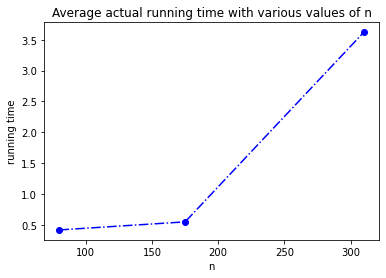

In [15]:
plotting(X_list, Y_list)

In [16]:
X_list

[80.0, 175.0, 310.0]

In [17]:
Y_list

[0.4168820381164551, 0.5475342273712158, 3.6218107427869524]